# Exploratory Data Analysis:

#### Haberman's Survival Data

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

#### Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer or 2 = the patient died within 5 year

#### Objective: To determine the whether the given new patient will survival or not 


In [2]:
# import the required modules for data anlysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


In [3]:
# Load the data set 
data = pd.read_csv("haberman.csv")
data.head() # print the first 5 rows using head() function

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


As we see in the above result,given data set didn't have features names.Give columns or attributes or features names for data set

In [4]:
features = ['age','operation_year','axil_nodes','survival']  # list of column names

data = pd.read_csv("haberman.csv",names = features)

data.head()   # print the first 5 rows using head() function

,age,operation_year,axil_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


##### High Level Statistics

In [5]:
# number of observations and features
data.shape   # Prints number of data points and columns

(306, 4)

The above output indicates that there are total 306 data points or observations and 4 features or attributes per each observation

In [52]:
# Number of data points are there for each class 1 and 2

data['survival'].value_counts()

1    225
2     81
Name: survival, dtype: int64

#### Observations: 
* The above output indicates there are 225 data points that belong to class 1 and 81 to class 2
* Given DataSet is imbalanced, since 74 percent belongs to class 1 and 26 percent observations belongs to class 2

#### Some useful seaborn documentation for plotting

Go to the link for reference of FacetGrid Object
> https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid

For map() function
> https://seaborn.pydata.org/tutorial/axis_grids.html?highlight=map

For distplot
> https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot


## Bivariate Analysis:

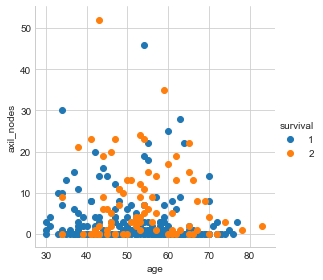

In [59]:
# plotting 2d scatter plot between 
sbn.set_style("whitegrid");
g = sbn.FacetGrid(data, hue="survival", size=4)
g.map(plt.scatter, "age", "axil_nodes").add_legend();
plt.show();

#### Observations:
* As we can see from the above plot, we cannot differentiate people who are survived or not 
* Some people having age less than or equal to 32 and positive axilary_nodes less than or equal to 5 have survived

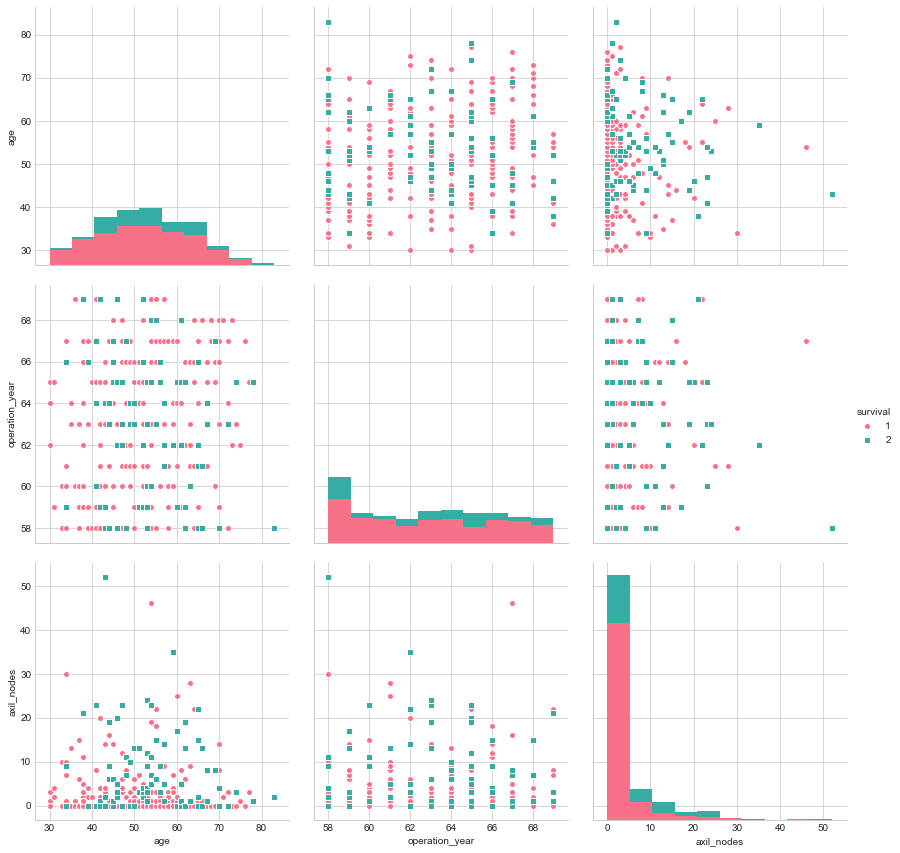

In [93]:
# pairwise scatter plot: Pair-Plot

'''
https://seaborn.pydata.org/generated/seaborn.pairplot.html

'''
plt.close();
# sbn.set_style("whitegrid");
sbn.pairplot(data, hue="survival", size=4,palette="husl",markers=["o", "s"],vars=['age','operation_year','axil_nodes']);
plt.grid()
plt.show()

# As pairplot plots each and every numeric column in the dataset,using vars dictionary avoiding the survival column 

#### Observations:
* As most of the plots are overlapping, we can't get much sense out of data.
* Some people having age less than or equal to 32 and positive axilary_nodes less than or equal to 5 have survived

#### Univariate Analysis 
* Histogram 

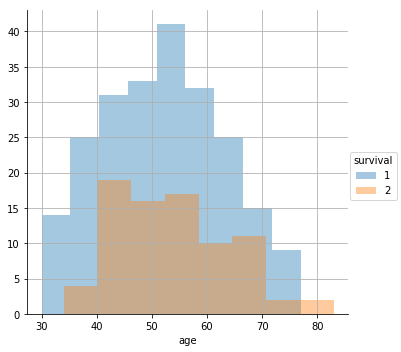

In [39]:
# plotting age 
g = sbn.FacetGrid(data,hue="survival",size = 5)
g.map(sbn.distplot, "age",kde=False).add_legend() # kde  = False indicates we are not contructing pdf on top of histogram
plt.grid()
plt.show();

#### Observations:
* The people whose age is between 35 to 75, we can't make any sense out of it. As it they are overlapping
* The people whose age is greater than 30 and less than 35 are survived more than 5 years
* The people whose age is greater than 75 and less than 83 are not survived more than 5 years

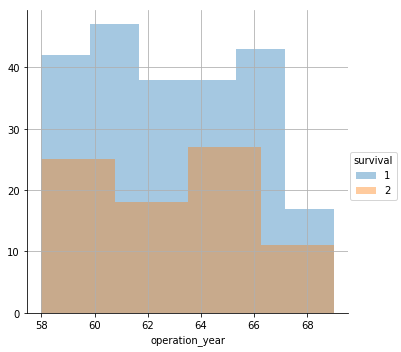

In [40]:
# plotting operation_year
g = sbn.FacetGrid(data,hue="survival",size = 5)
g.map(sbn.distplot, "operation_year",kde=False).add_legend()
plt.grid()
plt.show();

#### Observation:
* As we can see from the above plot, we can't get much sense out of data, as they are mostly overlapping

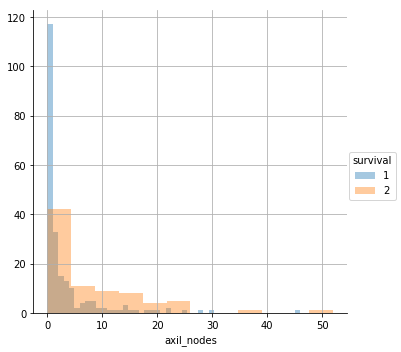

In [41]:
# plotting axil_nodes
g = sbn.FacetGrid(data,hue="survival",size = 5)
g.map(sbn.distplot, "axil_nodes",kde=False).add_legend()
plt.grid()
plt.show();

#### Observation:
* Most of the people having zero positive axiliary node survived more than 5 years

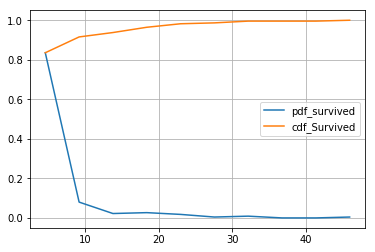

In [50]:
survived = data.loc[data['survival'] == 1]
notSurvived = data.loc[data['survival'] == 2]

# plotting pdf and cdf for survival

# Survived
counts, bin_edges = np.histogram(survived['axil_nodes'], bins = 10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['pdf_survived','cdf_Survived'])
plt.grid()
plt.show();


#### Observations: 
* From the above plot, PDF represents about 82 percent of data points have axil_nodes between 4 and 10
* CDF: There are 82 percent of survived people have positive axilary node <= 5

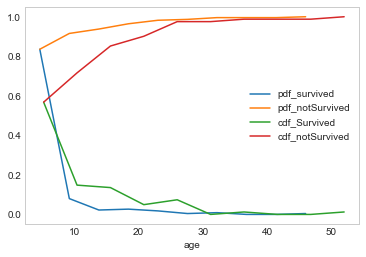

In [71]:
# plotting pdf and cdf

# Survived
counts, bin_edges = np.histogram(survived['axil_nodes'], bins = 10,density = True)
pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# not Survived
counts, bin_edges = np.histogram(notSurvived['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['pdf_survived','pdf_notSurvived','cdf_Survived','cdf_notSurvived'])
plt.xlabel('age')
plt.grid()
plt.show()

#### Summarizing quantitative data using mean,standard deviation,variance,percentailes

In [94]:
# Mean, Std-deviation of axil_nodes feature 
print("Means:")
print(np.mean(survived["axil_nodes"]))
print(np.mean(notSurvived["axil_nodes"]))


print("\nStd-dev:");
print(np.std(survived["axil_nodes"]))
print(np.std(notSurvived["axil_nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


#### Observations: 
* People who survived have less average number of positive axillary nodes than the not survived people.
* People who survived less spread than the not survived people.


#### Median, Percentile, Quantile, IQR

In [98]:
#Median, Quantiles, Percentiles, IQR.

print("Medians:")
print(np.median(survived["axil_nodes"]))
print(np.median(notSurvived["axil_nodes"]))

print("\nQuantiles:")
print(np.percentile(survived["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(notSurvived["axil_nodes"],np.arange(0, 100, 25)))

print("\nQuantiles:")
print(np.percentile(survived["axil_nodes"],90))
print(np.percentile(notSurvived["axil_nodes"],90))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Quantiles:
8.0
20.0


#### Box plot and Whiskers
* A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
* It is   especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set.

#### Following is the seaborn documentation link for boxplot
https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

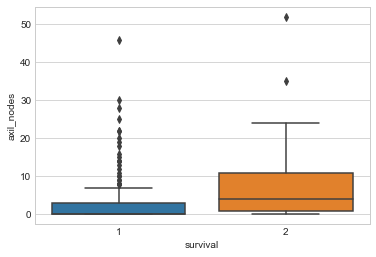

In [86]:
data1 = data
sbn.boxplot(x='survival',y='axil_nodes', data=data1)
plt.show()

#### Violin plots:

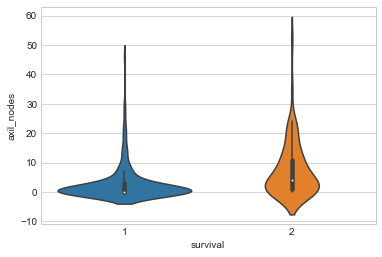

In [88]:
data1 = data
sbn.violinplot(x="survival", y="axil_nodes", data=data1, size=8)
plt.show()

## Conclusion:

* People having positive axillary nodes less than 4 are survived more than 5 years.
* Positive axillary nodes is an important feature.